# Homework 7

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import time

### Read in the ccdefault dataset

In [2]:
df = pd.read_csv("/Users/ashleychen/Desktop/UIUC/IE 598/HW6/ccdefault.csv")

### Split the data into train set and test set

In [3]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1, stratify = y)

### Part 1: Fit a random forest model for different n_estimators

In [4]:
size = [10, 50, 100, 200]
for i in size:
    forest = RandomForestClassifier(criterion='gini', n_estimators = i, random_state = 1)
    t0 = time.process_time()
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    scores = cross_val_score(estimator = forest,
                             X = X_train,
                             y = y_train,
                             cv = 10)
    mean = scores.mean()
    std = scores.std()
    print('For n_estimators = '+ str(i) + ': \n Accuracy: %0.6f (+/- %0.6f)'% 
          (mean, std))
    print(' Computation time:', round(time.process_time() - t0, 3), 's' )

For n_estimators = 10: 
 Accuracy: 0.804593 (+/- 0.006619)
 Computation time: 12.193 s
For n_estimators = 50: 
 Accuracy: 0.815742 (+/- 0.007299)
 Computation time: 61.987 s
For n_estimators = 100: 
 Accuracy: 0.815778 (+/- 0.006296)
 Computation time: 121.579 s
For n_estimators = 200: 
 Accuracy: 0.816815 (+/- 0.006169)
 Computation time: 240.353 s


### Part 2: Random forest feature importance

 1) AGE                            0.095263
 2) MARRIAGE                       0.067765
 3) PAY_6                          0.060900
 4) ID                             0.060055
 5) BILL_AMT1                      0.054563
 6) BILL_AMT2                      0.052115
 7) BILL_AMT5                      0.050414
 8) BILL_AMT6                      0.050305
 9) BILL_AMT3                      0.050253
10) BILL_AMT4                      0.049639
11) PAY_AMT1                       0.048203
12) PAY_0                          0.048059
13) PAY_AMT2                       0.046629
14) PAY_AMT5                       0.045892
15) PAY_AMT3                       0.043523
16) PAY_AMT4                       0.043482
17) PAY_2                          0.026382
18) PAY_3                          0.022653
19) SEX                            0.020544
20) PAY_4                          0.018764
21) PAY_5                          0.018551
22) EDUCATION                      0.013955
23) LIMIT_BAL                   

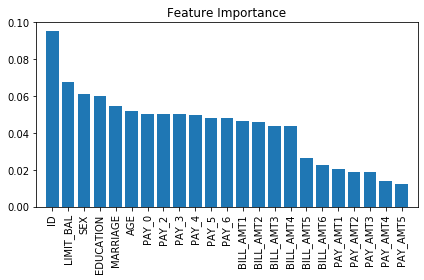

In [5]:
forest = RandomForestClassifier(n_estimators = 200, random_state=1)
feat_labels = df.columns[0:]
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1,
                            30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [6]:
print("My name is Yu Chi Chen")
print("My NetID is: yuchicc2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yu Chi Chen
My NetID is: yuchicc2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
